# Titanic Dataset - Exploratory Data Analysis

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Dataset Overview


In [5]:
# Check shape of datasets

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (891, 12)
Test shape: (418, 11)


In [6]:
# Overview of data types
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Check Missing Values

In [7]:
# checking missing values count

In [8]:
train.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

### Missing Values - Summary

- Cabin has the highest missing values (very sparse).
- Age has around 20% missing.
- Embarked has very few missing values.
- Other columns are mostly complete.


## 4. Check duplicate rows


In [9]:
train.duplicated().sum()


np.int64(0)

We can observe that there are no duplicate records found.

## 5. Univariate EDA (Single-Feature Analysis)

In [10]:
# Count of survived vs not survived

train['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
#lets check peercentage

train['Survived'].value_counts(normalize=True) * 100


Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

### Plot Survival Count

In [12]:
train.duplicated().sum()


np.int64(0)

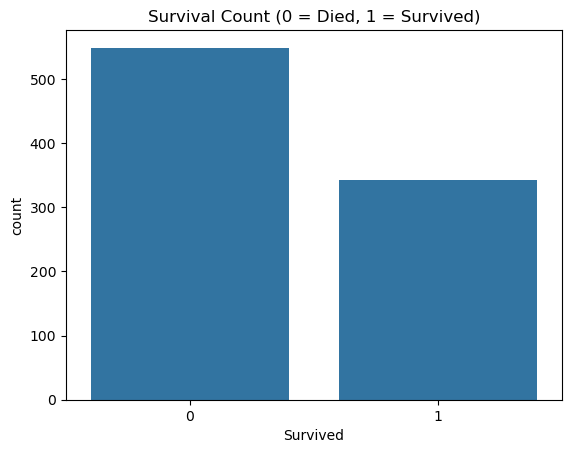

In [13]:
sns.countplot(data=train, x='Survived')

plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()


- We can observe that more people died than survived.
- Survival rate - 38% survived, 62% died

## 6. Categorical Features (Sex, Pclass, Embarked)

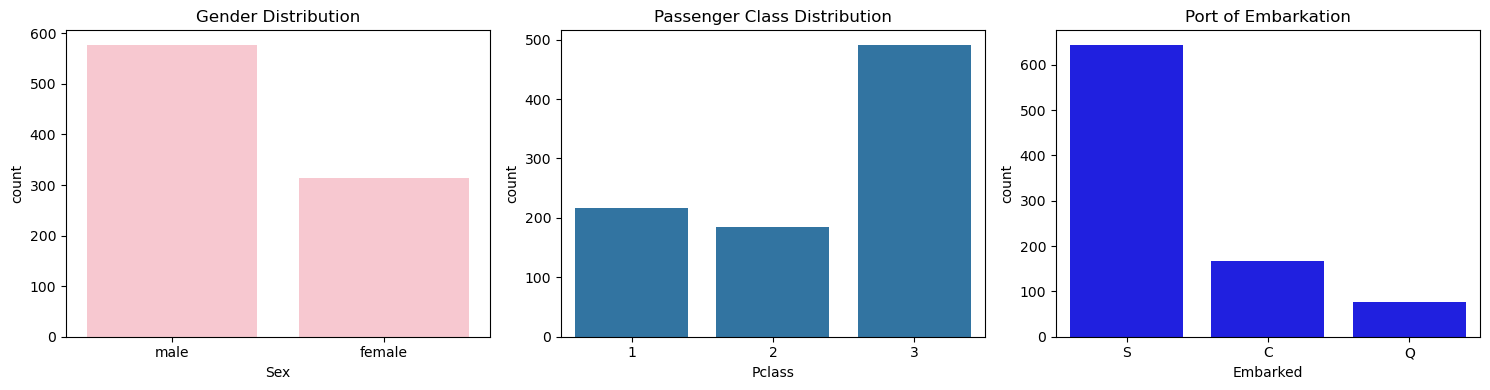

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.countplot(data=train, x='Sex', ax=axes[0],color='pink')
axes[0].set_title("Gender Distribution")

sns.countplot(data=train, x="Pclass", ax=axes[1])
axes[1].set_title("Passenger Class Distribution")

sns.countplot(data=train, x="Embarked", ax=axes[2],color='blue')
axes[2].set_title("Port of Embarkation")

plt.tight_layout()
plt.show()


 We can observe that :
- There are more number of male passengers travelling.
- More number of passengers travelled through Class 3.
- S has the highest Embarked passenger count.

## 7. Outlier Detection

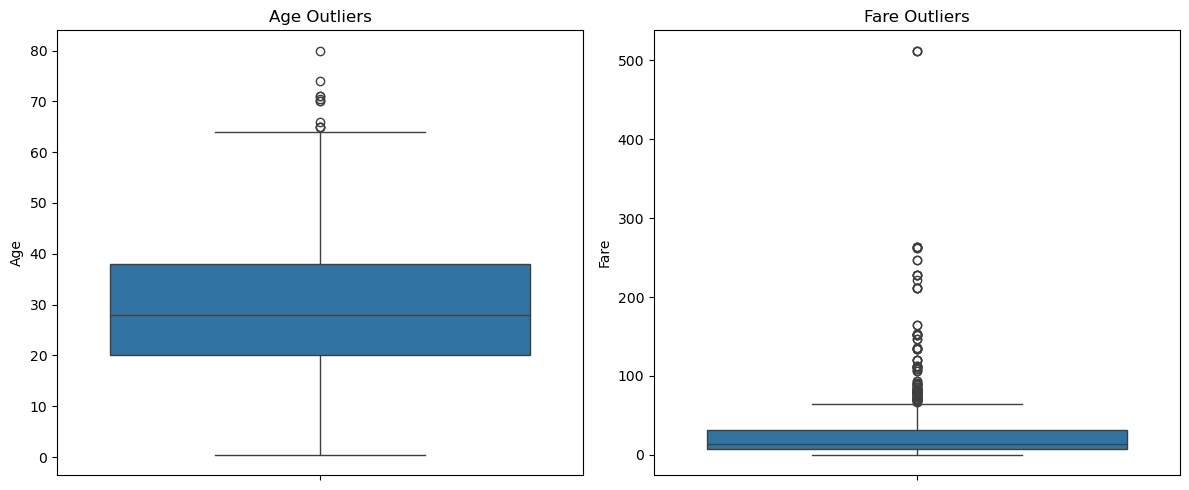

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=train['Age'])
plt.title("Age Outliers")

plt.subplot(1,2,2)
sns.boxplot(y=train['Fare'])
plt.title("Fare Outliers")

plt.tight_layout()
plt.show()


Fare column has significant high-value outliers, likely representing wealthy 1st-class passengers.
These outliers make sense and should NOT be removed.


## 8. Bivariate EDA

### Survival vs Sex

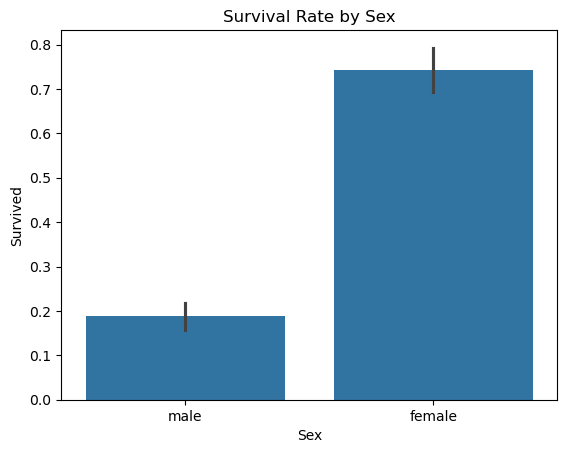

In [16]:
sns.barplot(data=train, x="Sex", y="Survived")
plt.title("Survival Rate by Sex")
plt.show()


We can observe that :

Females → High survival (~74%)

Males → Very low survival (~19%)

### Survival vs Passenger Class

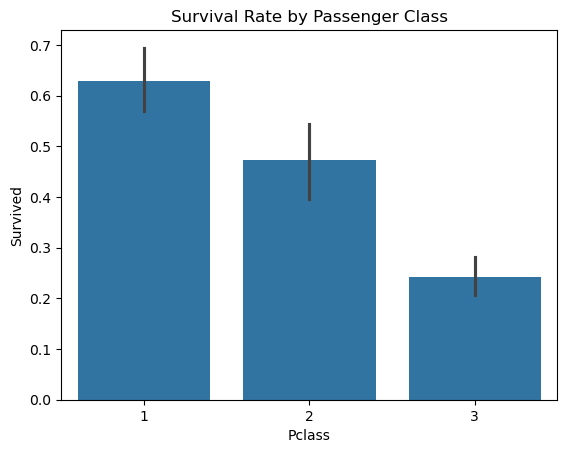

In [17]:
sns.barplot(data=train, x="Pclass", y="Survived")
plt.title("Survival Rate by Passenger Class")
plt.show()


1st class: highest survival

2nd class: medium

3rd class: lowest

This shows socio-economic status mattered.

### Survival vs Embarked Port

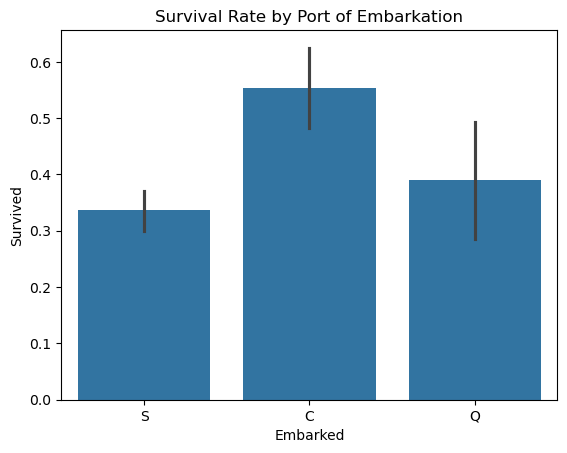

In [18]:
sns.barplot(data=train, x="Embarked", y="Survived")
plt.title("Survival Rate by Port of Embarkation")
plt.show()


- Passengers who boarded at C (Cherbourg) survived more

- S (Southampton) lowest survival

### Age Group Creation & Survival vs Age

In [19]:
age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels)


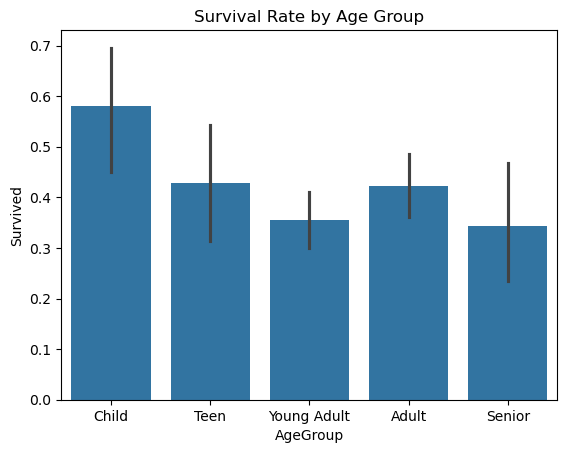

In [20]:
sns.barplot(data=train, x="AgeGroup", y="Survived")
plt.title("Survival Rate by Age Group")
plt.show()


Children → highest survival

Adults → lower

Seniors → lowest

This fits “women and children first”.

### Family Size & Survival

Family size = SibSp + Parch + 1

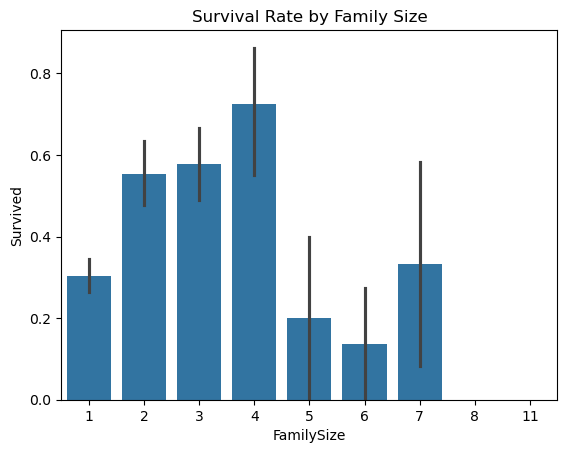

In [21]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

sns.barplot(data=train, x="FamilySize", y="Survived")
plt.title("Survival Rate by Family Size")
plt.show()


Small families (2–4) → better survival

Large families (6+) → worst survival

Solo passengers (1) → lower survival

## 9. Correlation Analysis

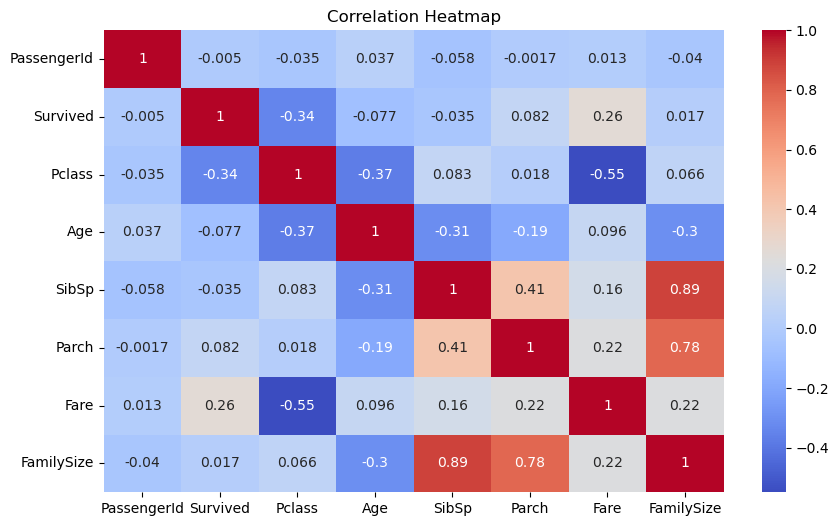

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## 7. Summary Insights

### Summary of Findings from Titanic EDA

### 1. Overall Survival
- About **38%** of passengers survived.
- Majority (~62%) did not survive.

### 2. Gender and Survival
- **Females survived much more** (74%) than males (19%).
- Gender is one of the strongest predictors of survival.

### 3. Passenger Class (Pclass)
- **1st class passengers** had highest survival (~63%).
- **3rd class passengers** had lowest survival (~24%).
- Higher socio-economic status → better chance of survival.

### 4. Age Groups
- **Children (0–12)** had the highest survival rate (~58%).
- Adults and seniors had lower chances.
- Supports "women and children first" evacuation.

### 5. Embarked Port
- Passengers from **Cherbourg (C)** had higher survival (~55%).
- **Southampton (S)** passengers had lowest survival (~34%).

### 6. Family Size
- **Small families (2–4 members)** had better survival.
- Very large families (6+) had the worst.
- Solo travelers (1) also had lower survival.

### 7. Missing Values Analysis
- **Cabin** has the highest missing values (77%) → unreliable feature.
- **Age** missing for 20% → needs imputation (median is recommended).
- **Embarked** has few missing → easy to handle.
- Most other fields are complete.

### **Overall Conclusion**
Survival on the Titanic was strongly influenced by **gender, passenger class, age, and family size**. Women, children, and higher-class passengers had significantly better survival chances.
